In [8]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from draw import DRAW
from networks import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
tf.reset_default_graph()

In [10]:
sess = tf.InteractiveSession()
build_encoder = Encoder(256)
build_decoder = Decoder(256)
train_iters = 2
print_iters = 100

In [11]:
model =  DRAW(sess, build_encoder, build_decoder, read_attn = True, write_attn = True)

In [12]:
model.train(train_itrs = 0, learning_rate = 1e-4, load = True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


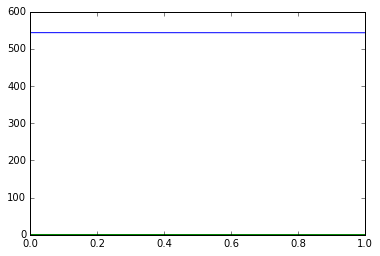

In [191]:
plt.plot(range(train_iters), model.Lxs, range(train_iters), model.Lzs)

In [13]:
generated_images = model.generate()

In [14]:
generated_images.shape

(10, 100, 784)

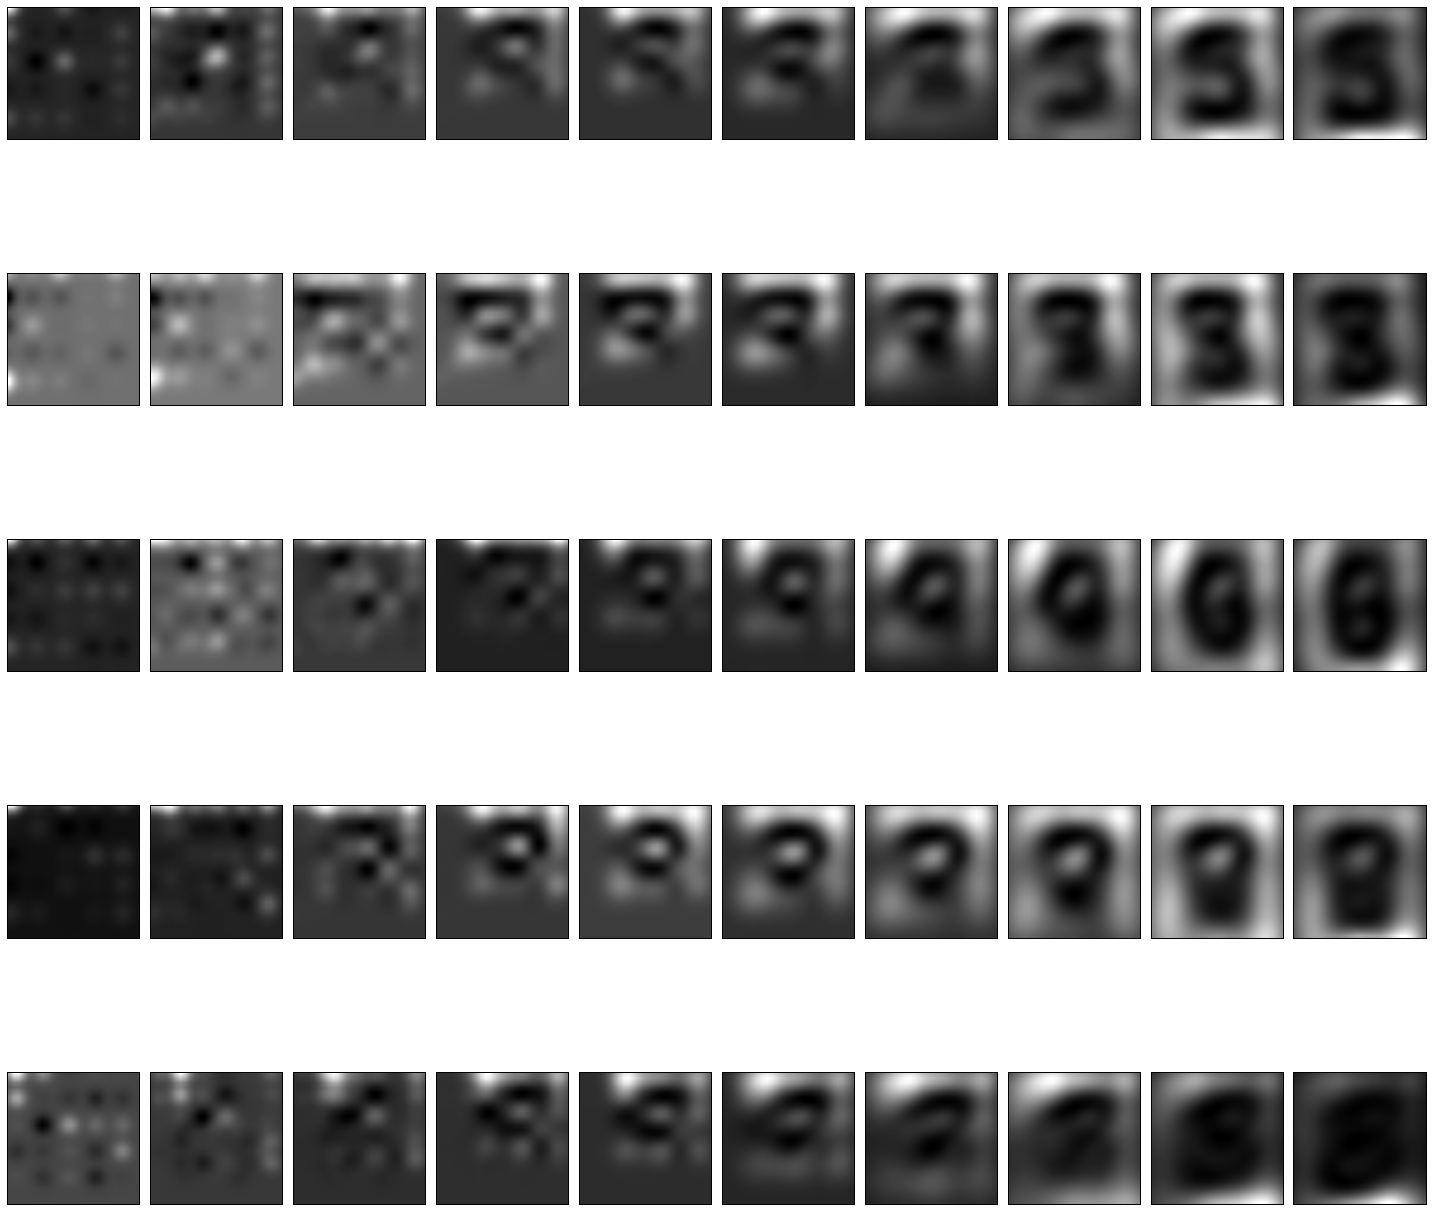

In [18]:
T = 10
num_examples = 5

plt.figure(figsize=(20,20))
for t in xrange(10):
    for n in xrange(num_examples):
        plt.subplot(num_examples, T, T* n + t + 1)
        plt.imshow(generated_images[t,n, ].reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.show()